<div style="border:solid green 2px; padding: 20px">
    
<b>Антон, привет! Это Александр</b> Я рад тебя видеть на финальном спринте (Основной проект).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если у тебя возникают вопросы — пиши об этом в слаке, не стесняйся. Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
    
---

Это исследование оттока клиентов банка «Метанпромбанк». Необходимо выяснить, какие клиенты уходят из банка, составить сегменты клиентов, которые склонны уходить из банка. Предложить примеры мероприятий для возврата клиентов в банк или удержания сомневающихся.


**Цели исследования**

* Определить ключевые параметры клиентов, которые уходят из банка
* Составить сегменты клиентов, состоящие из трех признаков и включащие не менее 500 клинетов
* Определить сегменты, с которыми следует работать в приотиетном порядке

**Ход исследования**

Данные представлены в виде обезличенной базы клиентов банка. О качестве данных ничего не известно, поэтому перед основным исследованием потребуется провести обзор данных. Надо проверить даные на пропуски, дубликаты и аномалии. Если они есть, надо найти возможность исправить некорректные данные, либо отфильтровать их.

Далее надо проанализировать параметры клиентов, и определить отдельные сегменты параметров, в которых отток клиентов выше среднего оттока по банку в целом. Также неоходимо проверить их корреляцию и статисчекую значимость превышения доли оттока в сегментах над долей оттока в среднем по банку. 

Затем необходимо укрупнить сегменты, выбрав сочетания сегментов отдельных трех параметров, чтобы в них было более 500 человек. Провести приоритизацию полученных укрупненных сегментов, для формулирования итоговых рекомендаций заказчику.

Таким образом, исследоваание будет состоять из пяти этапов:

- Загрузка данных и подготовка данных к анализу
- Исследовательский анализ данных
- Проверка корреляций параметров
- Проверка статистической значимости превышения оттока клиентов в выделеных сегментах
- Укрупнение сегментов
- Приоритизация полученных укрупненных сегментов
- Общие рекомендации


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Отличная практика - расписывать цель и основные этапы перед началом проекта

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import math as mth
import scipy.stats as stats

In [2]:
try: 
    data = pd.read_csv('d:/practicum/13-vypusk/bank_scrooge.csv')
except:
    data = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.precision', 2)
plt.rcParams ['figure.figsize'] = [15, 8]
pd.set_option('display.max_colwidth', None)

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [5]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


## Предобработка данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


### Колонки к нижнему регистру

In [7]:
data.columns = map(str.lower, data.columns)

### Обработка пропусков

Пропуски есть в колонках age и balance

#### Пропуски в колонке age

In [8]:
data[data['age'].isna()]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.00,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.00,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.00,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.00,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.00,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.00,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.00,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.00,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


26 пропусков в колонке возраст клиента. Это ошибки типа MAR (Missing At Random / Отсутствует случайно). Возможно, клиенты не указали возраст или менеджер его не вбил. С этими пропусками ничего нельзя сделать. Как либо восстановить - нельзя. В распределении пропусков каких либо закономерностей не усматривается, то есть они случайны - можно их отбрасывать Так как их мало, предлагаю просто удалить. 

Колонка имеет тип float, хотя приведены целое количество лет. Необходимо перевести в int, но с целочисленныи в вычислениях могут быть проблемы. Предлагаю оставить тип float, тут он ни на что не влияет.

In [9]:
data = data.dropna(subset=['age'])
#data['age'] = data['age'].astype('Int64') #НЕ стоит переводить !!! потом предупреждения-ошибки лезут =(((

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

С возрастом корректно - за малочисленностью можно смело отбросить.
:

#### Пропуски в колонке balance

2300 пропусков в колонке balance. Это ошибка типа MNAR (Missing Not At Random / Отсутствует не случайно).  Возможно, произошел сбой при экспорте данных.  

Проверка, есть ли нули в балансе дает всего две строчки. Наверняка, пропуски - это нули. Предлагаю заменить пропуски на нули.

In [10]:
data.query('balance == 0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.00,Ярославль,М,18.00,0,0.00,2,1,1,64548.33,0
6757,148456,813.00,Ярославль,М,20.00,2,0.00,2,1,0,23876.51,0


In [11]:
#data['balance'] = data['balance'].fillna(0)

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Замена пропусков на нули в таблице может иметь нежелательные последствия и привести к искажению данных и результатов анализа. Вот несколько основных причин, почему замена пропусков на нули неприемлема:

1. Искажение статистических показателей: Замена пропусков нулями может последовательно искажать статистические показатели, такие как среднее значение (mean) и стандартное отклонение (standard deviation). Если пропуски в данных имеются по каким-то определенным причинам, замена их на нули создаст иллюзию, что в этих местах значения фактически равны нулю. Это искажение может привести к ошибочным статистическим выводам и еправильным интерпретациям.

2. Искажение распределения данных: Пропуски в данных часто имеют систематическую природу и представляют собой информацию. Замена пропусков нулями приведет к добавлению большого количества наблюдений со значением нуля, что может серьезно искажить распределение переменной и создать ложные зависимости или корреляции в данных.

3. Потеря информации: Замена пропусков нулями может скрыть наличие пропущенных данных и потерять или затруднить обнаружение этих пропусков в дальнейшем анализе. Пропуски в данных могут иметь свою собственную семантику и информацию, например, отсутствие значения, значение вне диапазона или информацию об ошибке или недоступности. Изменение их на нули может привести к неправильным выводам и упущенной важной информации.

4. Ложные связи и зависимости: Замена пропусков нулями может создать ложные связи или зависимости между переменными. Если пропуски являются случайной причиной отсутствия информации, замена их на нули может внести несуществующую структуру и создать ложные корреляции или зависимости в данных.

Вместо замены пропусков нулями существуют более адекватные методы обработки пропущенных значений, такие как удаление пропущенных значений, замена их на среднее, медиану или другие статистические меры, использование специальных значений (например, «unknown»), использование методов интерполяции или применение алгоритмов заполнения пропущенных значений, например, на основе машинного обучения.

<div class="alert alert-info"> <b>Комментарии студента:</b> 
    
- Удалять пропуски в балансе - нельзя, так как 2300 строк это почти четверть всех данных 
- Интерполяция, экстрополяция - это для непрерывных величин (курсы валют, график накопления по сложному проценту) - не наш случай. 
- Замена на спецзначения - это для категориальных величин, у нас же float.
- Замена на среднее или медиану - вот мы счас запишем четверти клиентов по 500 или 800 тр на счет - вот уж где искажение! С пропускам в столбце "доход" так можно было бы поступить, особенно если выделять города / возраст. Но к балансу на счете - нет. Это случайная величиня: кто-то в лотерею выиграл, кто-то квартиру продал, кто-то наследство получил, а кто-то живет только на серую зп вот и нет счета в банке. Усреднять это - ну такое...  

Замена пропусков на нули в таблице может иметь нежелательные последствия и привести к искажению данных и результатов анализа. В целом - да, но не в этом случае. Как я потом буду использовать эти данные? Не для вычисления среднего или поиска зависимостей, а для разбития клиентов на сегменты. С этой точки зрения, куда попадут клиенты с пропусками - в сегмент с нулями, в -1, в НАН или в сегмент где-то в середине диапазона значений - не так важно. 
    
При замене нулями все пропуски попадают в большой сегмент где-то с боку диапазона. Причем в исходных данных было всего 2 записи с 0, то есть все клиенты с пропусками удачно попали в свой отдельный сегмент, практически вариант "специальное значение". Если уж на то пошло, для каких-то вычислений среднего или зависимостей, отфильтровать эти бывшие пропуски-нули можно будет очень просто.
    
Я настаиваю, что с пропусками в данном случае надо поступить именно так.
    </div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Меняя пропуски на 0, получаем сильное смещение распределения данных, это плохая практика. В реальной жизни сегодня заменил на 0, а завтра забыл и посчитал среднее. 
    
Корректнее будет оставить пропуски в их изначальном виде (не обязательно заменять направо и налево пропуска)

<div class="alert alert-info"> <b>Комментарии студента:</b> 
    
Ок оставляю Nan. Придется код в нескольких места переписать... 
    </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №3__

Да, теперь корректно

### Аномальные значения

In [12]:
data.describe().style.format('{:.0f}')

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974,9974,9974,9974,7695,9974,9974,9974,9974,9974
mean,171755,849,43,3,827246,2,1,1,147787,0
std,33696,65,12,2,1980327,1,0,0,139286,0
min,94561,642,18,0,0,0,0,0,2546,0
25%,142760,802,33,0,295699,1,0,0,75252,0
50%,172643,853,40,3,524295,2,1,1,119627,0
75%,201164,900,51,4,980051,2,1,1,174500,0
max,229145,1000,86,9,119113552,5,1,1,1395064,1


Аномальным выглядит products = 0. У клиента банка должен быть хоть какойто продукт, иначе чето это за клиент?

In [13]:
data.query('products == 0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.00,Рыбинск,Ж,79.00,3,NaN,0,0,0,25063.96,1


Всего один клиент - женщина 79 лет, с нулевым балансом, без кредитки и уже в оттоке. Предлагаю ее просто удалить из датасета.

In [14]:
data = data.query('products > 0')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Верно, нельзя быть клиентом банка, не имея его продуктов

Странным выглядит параметр last_activity, который, по легенде, отображает активность клиента за последние 7 дней. Среди отказников - 70%, а среди верных - менее 50%! Чтото не так с интерпритацией этой колонки. Предлагаю вообще его не брать во внимание.

In [15]:
data.query('last_activity == 1 and churn == 1')['userid'].count() / data.query('churn == 1')['userid'].count()

0.7024202420242024

In [16]:
data.query('last_activity == 1 and churn == 0')['userid'].count() / data.query('churn == 0')['userid'].count()

0.48289393010423054

### Дубликаты

#### Полные дубликаты

In [17]:
data.duplicated().sum()

0

Полных дубликовто нет

#### Дубликаты по полю userid

userid, которое по идее должно быть уникальным

In [18]:
data['userid'].duplicated().sum()

50

50 дубликатов. Многовато, чтобы просто так удалить

In [19]:
data[data['userid'].duplicated(keep=False)].sort_values(by='userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.00,Рыбинск,Ж,55.00,1,362756.49,3,0,1,175920.48,1
7694,116540,887.00,Ярославль,Ж,38.00,0,NaN,1,0,1,119247.61,0
4866,117943,855.00,Рыбинск,Ж,32.00,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.00,Ярославль,Ж,40.00,0,NaN,1,1,0,137718.93,0
5863,120258,908.00,Рыбинск,Ж,38.00,4,2213581.63,2,0,1,160327.77,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934.00,Рыбинск,Ж,74.00,5,1294285.39,3,1,0,95606.80,0
2597,226719,990.00,Ярославль,М,37.00,4,14648692.14,2,0,0,934412.61,1
4216,226719,903.00,Рыбинск,Ж,63.00,0,NaN,1,1,0,138582.58,0
8205,227795,840.00,Рыбинск,М,34.00,2,350768.03,1,1,0,102036.14,1


Похоже дублирование userid получились при слиянии баз клиентов из разных городов - Рыбинск и Ярославль.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

В целом можно удалить удалить этот столбец, т.к. он не нужен по EDA

<div class="alert alert-info"> <b>Комментарии студента:</b> 
    
Я потом много где его использую для count(). Мне кажется, самое правильное - использовать для подсчета count() именно ключевой столбец с уникальными значениями 
    </div>

Предлагю прибавить userid клиентов из Рыбинска 1000000, и тогда они станут уникальными. Их номера можно будет легко вернуть назад. Пока максамум userid около 230 тысяч, то есть номер 1000000+ будет сразу виден.

In [20]:
data.loc[data['userid'].duplicated(), 'userid'] = data['userid'] + 1000000

In [21]:
data[data['userid'].duplicated()]['userid'].sum()

0

Дублей userid в нет

### Сброс index после предобработки

In [22]:
data = data.reset_index(drop=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9973 entries, 0 to 9972
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9973 non-null   int64  
 1   score          9973 non-null   float64
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 935.1+ KB


**Промежуточный вывод**

Для анализа представлен датасет на 10 тысяч строк. В целом данные хорошего качества - пропуски были только в друх колонках age и balance. Еще в двух - products и userid - единичные аномальные значения.

В результате предобработки удалили 27 строк. 2300 пропусков значений в колонке баланс оставлены как есть.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Отсутствует вывод о качестве исходных данных. Поправишь, пожалуйста?
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> 
    
Добавил
    </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Спасибо за правки

## Исследовательский анализ

### Базовый уровень оттока

Определяем базовый уровень оттока как средний показатель по всему датасету

In [24]:
ottok_base = round(100 * data.query('churn == 1')['userid'].count() / data['userid'].count(), 2)
ottok_base

18.23

Базовый уровень оттока клиентов 18,23%. 

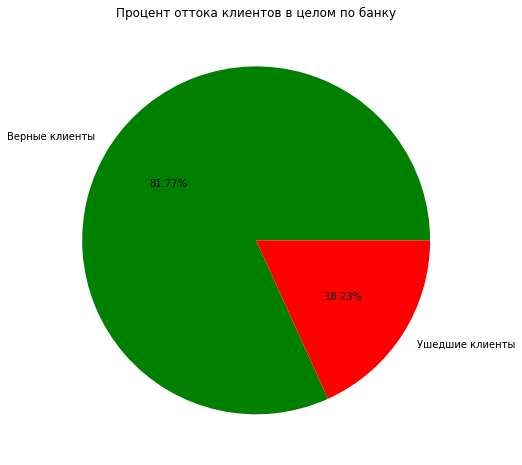

In [25]:
plt.pie(data.groupby('churn')['userid'].count(), labels = ['Верные клиенты', 'Ушедшие клиенты'], \
        colors = ['green', 'red'], autopct='%1.2f%%')
plt.title('Процент оттока клиентов в целом по банку')
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Среднебанковский отток найден правильно

### Анализ оттока по отдельным признакам

Проведем анализ оттока по отдельным признакам (колонкам). Нас интересует признаки, для которых отток выше среднего по банку

#### Анализ оттока по категориальным колонкам

In [26]:
# --------- Функция определения процента оттока в категориальных колонках
# 1 Считаем всех по группам категорий, записываем в колонку all 
# 2 Cчитаем ушедших по группам категорий, записываем в колонку ottok
# 3 Делим второе на первое, записываем в колонку proc
# На выходе получаем таблицу в индексах - категориальные значения, колонки all, ottok, proc 

def proc_ottok_cat(col):
    ttt = pd.DataFrame([])
    ttt['all'] = data.groupby(col)['userid'].count()
    ttt['ottok'] = data.query('churn == 1').groupby(col)['userid'].count()
    ttt['proc'] = round(100 * ttt['ottok'] / ttt['all'], 2) 
    return ttt 

In [27]:
#Словарь для нормальных подписей графиков
col_rus = {'age': ['Возраст', 'Лет'], 
           'city': ['Город', 'Город'], 
           'gender': ['Пол', 'Пол'], 
           'equity': ['Балл собственности', 'Балл'], 
           'products': ['Количество продуктов', 'Количество продуктов'],    
           'credit_card': ['Кредитная карта', ''],               
           'score': ['Кредитный рейтинг', 'Баллы'], 
           'balance': ['Баланс на счете', 'тыс.руб.'], 
           'est_salary': ['Оценочный доход', 'тыс.руб.']}


In [28]:
# -----------  Функция подсветки процентов оттока выше среднего по банку. 
# подсветить красным, что выше среднего по банку
def highlight_proc(s):
    return ['background-color: tomato' if val > ottok_base else 'background-color: lime' for val in s]

-------- Оценка оттока клиентов по параметру Город-------- 


,all,ottok,proc
city,,,
Ростов,1416,265,18.71
Рыбинск,2682,436,16.26
Ярославль,5875,1117,19.01


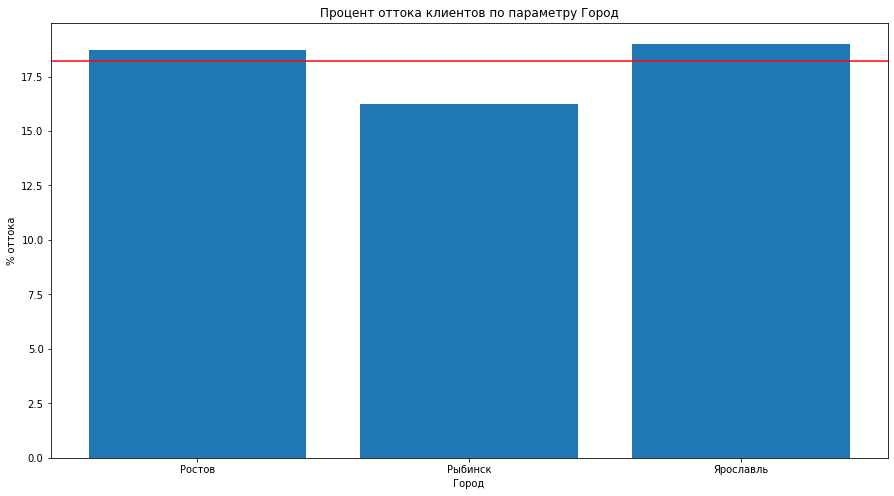

-------- Оценка оттока клиентов по параметру Пол-------- 


,all,ottok,proc
Женщины,4982,635,12.75
Мужчины,4991,1183,23.70


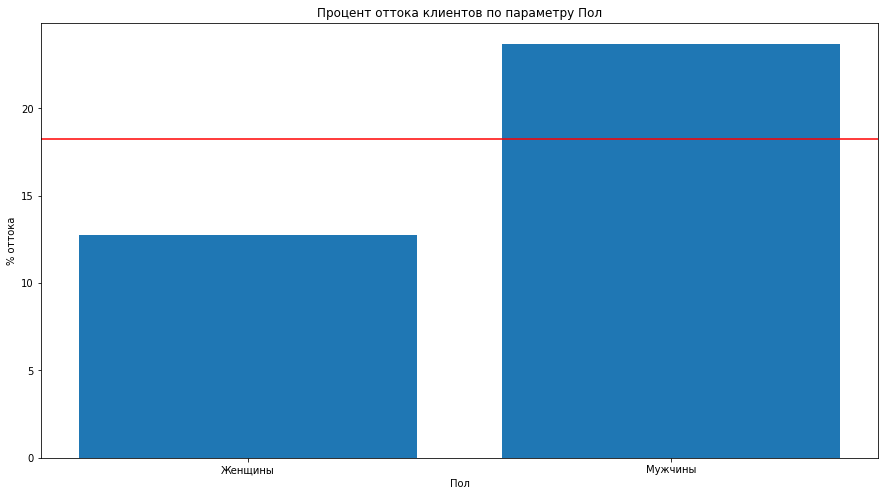

-------- Оценка оттока клиентов по параметру Балл собственности-------- 


,all,ottok,proc
equity,,,
0,2576,90,3.49
1,773,93,12.03
2,1051,166,15.79
3,1540,321,20.84
4,1847,464,25.12
5,1915,576,30.08
6,161,58,36.02
7,80,37,46.25
8,17,6,35.29


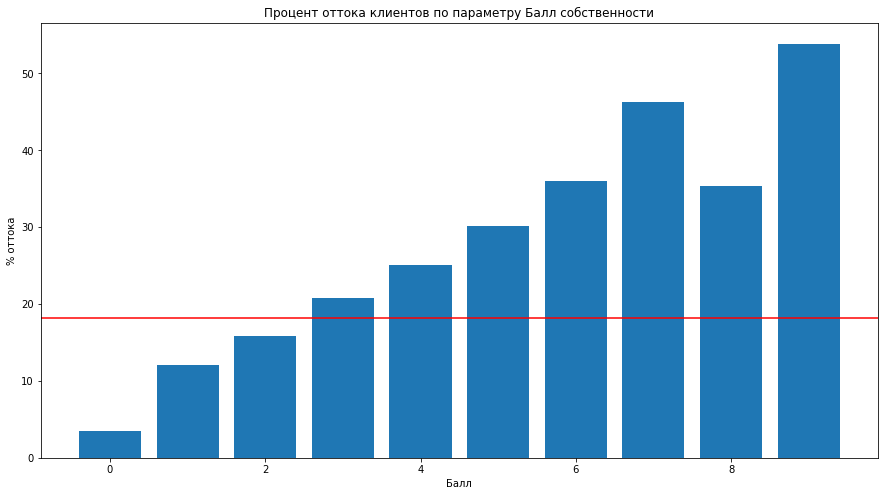

-------- Оценка оттока клиентов по параметру Количество продуктов-------- 


,all,ottok,proc
products,,,
1,3323,235,7.07
2,5119,978,19.11
3,1038,297,28.61
4,474,300,63.29
5,19,8,42.11


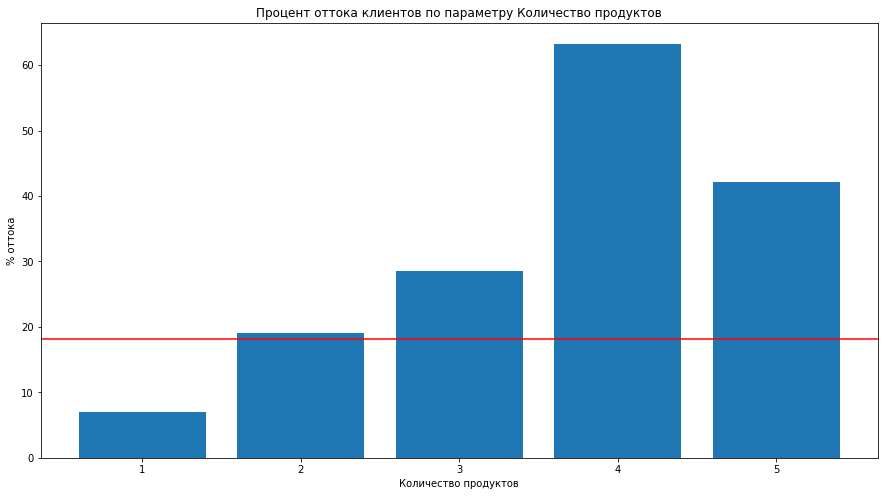

-------- Оценка оттока клиентов по параметру Кредитная карта-------- 


,all,ottok,proc
нет карты,3189,815,25.56
есть карта,6784,1003,14.78


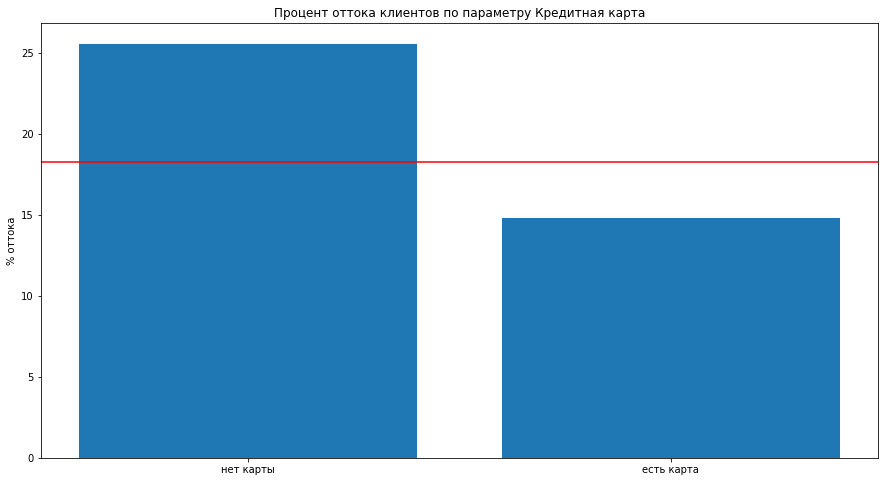

In [29]:
#цикл вывода процентов оттока по интервалам в непрерывных колонках
ottok_col_all = pd.DataFrame([], columns = ['col', 'seg', 'all', 'ottok', 'proc'])
for col in ['city', 'gender', 'equity', 'products', 'credit_card']:
    ottok_col = proc_ottok_cat(col)
    
    print('\033[1m' + '-------- Оценка оттока клиентов по параметру '+col_rus[col][0]+'-------- \033[0m')
    if col =='credit_card':  ottok_col.index = ['нет карты', 'есть карта']
    if col =='last_activity':  ottok_col.index = ['не активный', 'активный']
    if col =='gender':  ottok_col.index = ['Женщины', 'Мужчины']
        
    
    display(ottok_col.style.apply(highlight_proc, subset='proc'))
    
    ottok_col['seg'] = ottok_col.index
    ottok_col['col'] = col
    ottok_col_all = pd.concat([ottok_col_all, ottok_col], ignore_index=False)
    
#    plt.figure(figsize=(15,8))
    plt.bar(x = ottok_col.index, height = ottok_col['proc'])
    plt.axhline(y=ottok_base, color='red')
    plt.ylabel('% оттока')
    plt.xlabel(col_rus[col][1])
    plt.title('Процент оттока клиентов по параметру '+ col_rus[col][0])
    #plt.text(-1, ottok_base, ottok_base, color='red')
    plt.show()

В категориальных колонках отток выше среднего у клиентов со следующими параметрами:
    
* из Ростова или Ярославля
* мужчины
* бал собственности выше 3
* количество продуктов больше 2
* нет карты
    

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Рыбинск лучший город

In [30]:
data[data['balance'].notna()]['balance']

0        59214.82
1       850594.33
3      1524746.26
4          174.00
5       863687.24
          ...    
9965    179765.62
9967    370912.79
9968     78144.65
9971    865457.97
9972   1180886.70
Name: balance, Length: 7695, dtype: float64

#### Анализ оттока по непрерывным колонкам

In [31]:
# --------- Функция определения процента оттока в непрерывных колонках
# 1 через процентили задаем границы 10 интервалов непрерывной величины
# 2 берем две соседние границы интервалов a1 и a2, формируем из них строчку для query 
# 3 Формируем индекса для индекса итоговой таблицы a1-a2
# 4 Считаем всех в заданном интервале через query, записываем в колонку all с сформированным индексом 
# 5 Cчитаем ушедших в заданном интервале через query, записываем в колонку ottok с сформированным индексом
# 4 Делим ottok на all, записываем в колонку proc
# На выходе получаем таблицу в индексах - границы интервалов, в колонках - all, ottok, proc 


def proc_ottok_num(col):
    ttt = pd.DataFrame([])
    pr = np.percentile(data[data[col].notna()][col], list(range(0, 110, 10)))
    for i in range(1, 11):
        a1 = pr[i-1]
        a2 = pr[i]      
        i = str(int(a1))+'-'+str(int(a2))
        if col in ['balance', 'est_salary']: i = str(int(a1/1000))+'-'+str(int(a2/1000)) #для денег в тысячи рублей
        qst = '@a1 <= '+col+' <= @a2' 
            #с двумя "больше-равно" интервалы накладываются, особенно в Возрасте. 
            #но в данном случае это не критично, зато нет проблем с нулями в балансе 
        ttt.loc[i, 'all'] = data.query(qst)['userid'].count()
        ttt.loc[i, 'ottok'] = data.query('churn == 1 and '+ qst)['userid'].count()

    ttt['proc'] = round(100 * ttt['ottok'] / ttt['all'], 2)
    return ttt 

----------- Оценка оттока клиентов по сегментам параметра Возраст ----------- 


,all,ottok,proc
18-29,1148.00,264.00,23.00
29-32,1215.00,257.00,21.15
32-35,1544.00,313.00,20.27
35-37,1204.00,209.00,17.36
37-40,1391.00,234.00,16.82
40-44,1468.00,206.00,14.03
44-48,1009.00,133.00,13.18
48-54,1191.00,271.00,22.75
54-61,1228.00,321.00,26.14
61-86,1032.00,66.00,6.40


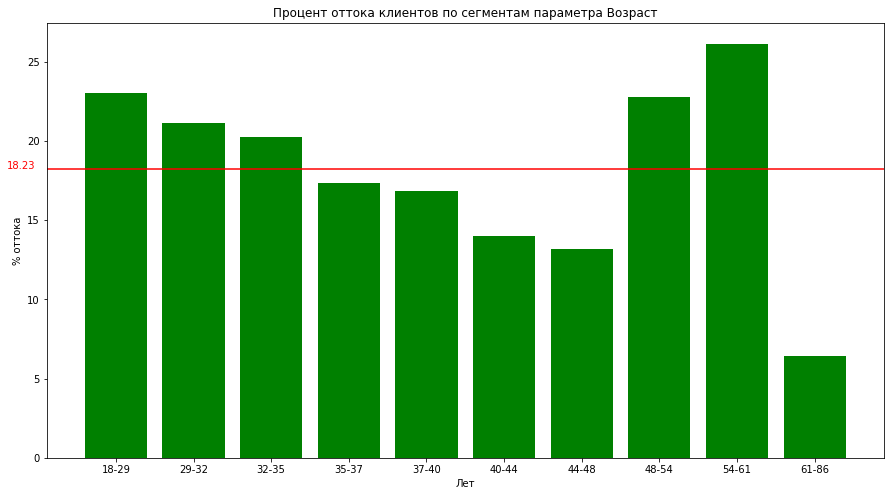

----------- Оценка оттока клиентов по сегментам параметра Кредитный рейтинг ----------- 


,all,ottok,proc
642-765,1019.00,47.00,4.61
765-791,1024.00,107.00,10.45
791-812,1024.00,154.00,15.04
812-832,1044.00,196.00,18.77
832-853,1085.00,251.00,23.13
853-873,1024.00,309.00,30.18
873-891,1030.00,265.00,25.73
891-908,1089.00,225.00,20.66
908-928,1056.00,190.00,17.99
928-1000,1007.00,166.00,16.48


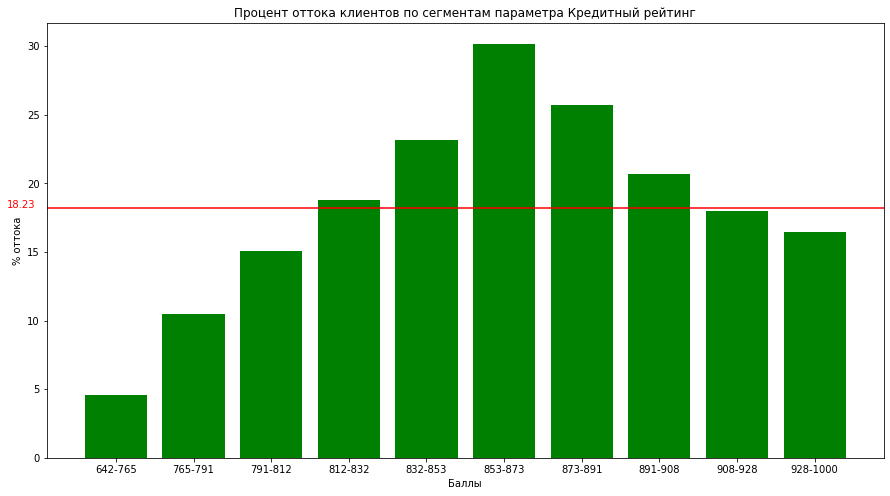

----------- Оценка оттока клиентов по сегментам параметра Баланс на счете ----------- 


,all,ottok,proc
0-159,770.00,127.00,16.49
159-256,769.00,115.00,14.95
256-337,770.00,122.00,15.84
337-419,769.00,136.00,17.69
419-524,770.00,147.00,19.09
524-660,770.00,145.00,18.83
660-853,769.00,181.00,23.54
853-1125,770.00,192.00,24.94
1125-1460,769.00,266.00,34.59
1460-119113,770.00,376.00,48.83


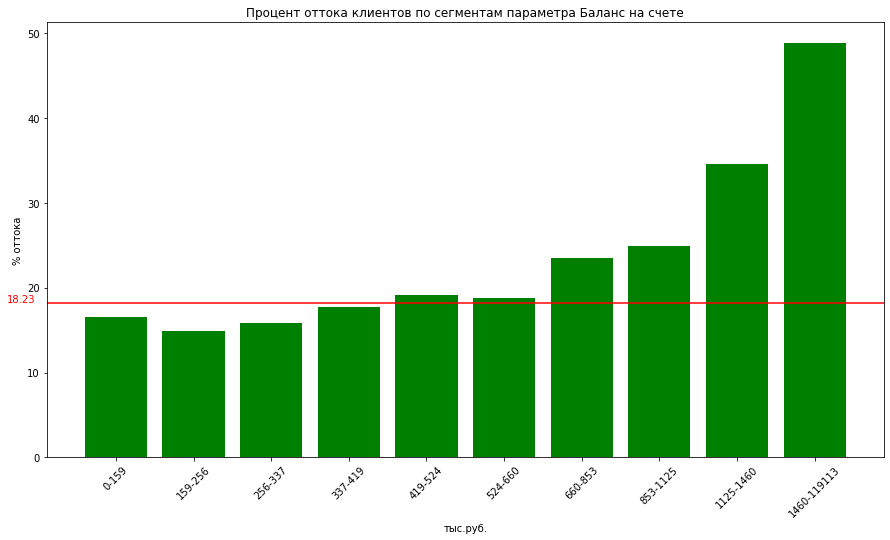

----------- Оценка оттока клиентов по сегментам параметра Оценочный доход ----------- 


,all,ottok,proc
2-45,998.00,137.00,13.73
45-66,997.00,160.00,16.05
66-83,997.00,168.00,16.85
83-101,997.00,174.00,17.45
101-119,998.00,208.00,20.84
119-139,998.00,203.00,20.34
139-161,997.00,193.00,19.36
161-189,997.00,207.00,20.76
189-242,997.00,194.00,19.46
242-1395,998.00,174.00,17.43


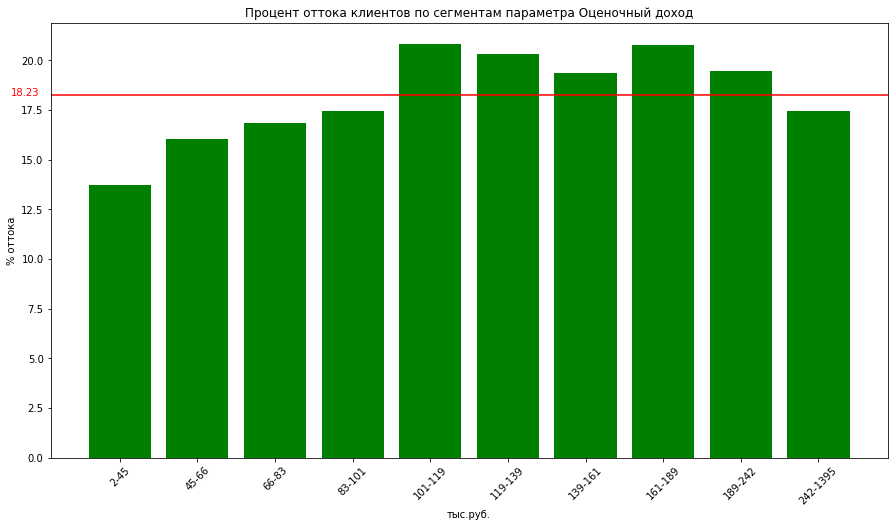

In [32]:
#цикл вывода процентоа оттока по интервалам в непрерывных колонках
for col in ['age', 'score', 'balance', 'est_salary']:
    ottok_col = proc_ottok_num(col)
    
   
    print('\033[1m' + '----------- Оценка оттока клиентов по сегментам параметра '+col_rus[col][0]+' ----------- \033[0m')
    display(ottok_col.style.apply(highlight_proc, subset='proc'))
    
    ottok_col['seg'] = ottok_col.index
    ottok_col['col'] = col    
    ottok_col_all = pd.concat([ottok_col_all, ottok_col], ignore_index=False)

#    plt.figure(figsize=(15,8))
    plt.bar(x = ottok_col.index, height = ottok_col['proc'], color='green')
    plt.axhline(y=ottok_base, color='red')
    plt.ylabel('% оттока')
    plt.xlabel(col_rus[col][1])
    plt.title('Процент оттока клиентов по сегментам параметра '+col_rus[col][0])
    plt.text(-1.4, ottok_base , ottok_base, color='red')
    if col in ['balance', 'est_salary']: plt.xticks(rotation = 45)
    plt.show()

В непрерывных колонках отток выше среднего у клиентов со следующими параметрами:
    
* возраст 18-35 или 48-61
* кредитный рейтинг в интервле 812 - 908
* баланс на счете больше 420 т.р.
* оценочный доход в интервале 101 - 242

Для дальнейшего использования выявленых сегментов может окрулить????

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Молодец, что используешь собственные функции

## Корреляция признаков

Для вычисления корреляции неупорядоченных категориальных колонок (gender и city) требуется их кодирование. Создаем копию датасета с новыми стобцами фиктивных переменных, которые кодируют данные в категориальных колонках

In [33]:
data_corr = pd.get_dummies(data, columns=['gender', 'city'], drop_first=False)
data_corr = data_corr.drop('userid', axis=1)
data_corr.head()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
0,850.00,25.00,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0
1,861.00,37.00,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0
2,892.00,30.00,0,NaN,1,1,1,107683.34,0,1,0,0,1,0
3,866.00,51.00,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1
4,730.00,34.00,5,174.00,1,1,0,67353.16,1,0,1,0,0,1


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Кодирование проведено успешно

In [34]:
# ------- Функция подсветки корреляции ----------
# подсветить зеленым умеренную и более тестную связь (0,3–1) по шкале Чеддока
def highlight_corr(s):
    return ['background-color: lime' if abs(val) > 0.3 else 'background-color: tomato' for val in s]


Вычисляем попарные коэффициенты корреляции

In [35]:
data_corr.corr().style.apply(highlight_corr).format('{:.3f}'.format)

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
score,1.000,-0.012,0.065,0.235,-0.004,-0.095,-0.030,0.164,0.106,-0.011,0.011,-0.038,-0.001,0.028
age,-0.012,1.000,0.021,0.070,0.018,-0.123,-0.008,-0.039,-0.050,0.213,-0.213,0.047,0.029,-0.060
equity,0.065,0.021,1.000,0.164,0.431,-0.167,-0.002,-0.172,0.270,0.021,-0.021,0.035,-0.005,-0.021
balance,0.235,0.070,0.164,1.000,0.076,-0.060,0.025,0.339,0.086,-0.051,0.051,-0.036,-0.034,0.057
products,-0.004,0.018,0.431,0.076,1.000,-0.252,0.037,-0.118,0.301,0.022,-0.022,-0.007,-0.042,0.043
credit_card,-0.095,-0.123,-0.167,-0.060,-0.252,1.000,-0.033,0.036,-0.130,-0.126,0.126,-0.098,-0.050,0.115
last_activity,-0.030,-0.008,-0.002,0.025,0.037,-0.033,1.000,0.003,0.170,0.013,-0.013,0.007,0.049,-0.049
est_salary,0.164,-0.039,-0.172,0.339,-0.118,0.036,0.003,1.000,0.002,-0.082,0.082,-0.106,-0.057,0.126
churn,0.106,-0.050,0.270,0.086,0.301,-0.130,0.170,0.002,1.000,-0.142,0.142,0.005,-0.031,0.024
gender_Ж,-0.011,0.213,0.021,-0.051,0.022,-0.126,0.013,-0.082,-0.142,1.000,-1.000,0.015,0.015,-0.024


<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

user_id не нужно анализировать на предмет корреляции Тут user_id может быть связана с хронологией (но при этом корреляцию Пирсона тоже смотреть некорректно, т.к. то что у одного клиента id на тысячу больше чем у другого не говорит нам о конкретном чётком сроке заключения первого договора с банком).

<div class="alert alert-info"> <b>Комментарии студента:</b> 
    
Я и не собирался его анализировать. Просто data.corr() сравнивает всех со всеми. Не надо заморачиваться откидывать отдельные колонки. А дальше глазами смотришь колонки, которые нужны. По легенде заказчик будет смотреть только презентацию, а тетрадку только тимлид, который, по идее, должен это понимать =)
    
Удалил столбец userid, чтобы не смущал
    </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Спасибо за правку)

Оценим полученные коэффициенты корреляции по Шкале Чеддока, которая используется для качественной оценки тесноты связи.

* 0,1–0,3 — слабая связь;
* 0,3–0,5 — умеренная связь;
* 0,5–0,7 — заметная связь;
* 0,7–0,9 — высокая связь;
* 0,9–0,99 — весьма высокая связь.

Отток умеренно коррелирует только с количеством продуктов. Чуть-чуть до критерия "умеренной связи" не хватило параметру Балл собственности.

Умеренная связь обнаруживается между Балансом на счет и Оценочным доходом, а также Количеством продуктов и Баллами собственности. (При оставлении пропусов в балансе NaN).

С другими параметрами связь если и обнаруживается, то слабая.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Верная интерпретация значений корреляции. Так держать!)

## Проверка статистических гипотез

### Сравнение бинарных признаков

В данном исследовании мы сравнивааем доли одного признака в отдельных сегментах и доли этого же признака во всей выборке. То есть сраниваем отношение двух чисел с отношением других двух чисел. Объектом исследования не является какая-то большая выборка нормально или ненормально распределенная. То есть применять тесты для выборок - Стьюдента или Манна-Уитни, оценивать распределение выборки, дисперсию, стандартное отклонение - просто не на чем. 

В нашем случае следует применять тест пропорций: одновыборочный Z-тест, используемый для сравнения среднего значения выборки с известным средним значением генеральной совокупности. Возьмеем Z-тест из пакета statsmodels.

Оценим выделенные сегменты статическими методом Z-тест. Будем сравнивать пропорции оттока клиентов в сегментах с базовым уровнем оттока по всему банку. Нулевая гипотеза - пропорции оттока клиентов равны в сегменте и в целом по банку. Альтернитивная гипотеза - правосторонняя доля оттока клиентов в сегменте больше базового в целом по банку. Установим p-value = 5%. То есть если p-value для конкретного сегмента будет меньше 0.05, то мы можем отвергнуть нулевую гипотезу и принять альтернативую, что доля оттока клиентов в этом сегменте больше, чем в целом по банку.

In [36]:
# --------- функция подсветки p-value ----------
# подсветить оранжевым p-value меньше 0.05 - где отток статистически значимо больше среднего
def highlight_stat(s):
    return ['background-color: none' if val > 0.05 else 'background-color: orange' for val in s]

In [37]:
ottok_col_all = ottok_col_all.reset_index(drop=True)

In [38]:
#-------- цикл стат. проверки всех сегментов -------
for i in range(0, len(ottok_col_all)):
    ottok_col_all.loc[i, 'p-val'] = proportions_ztest(
        ottok_col_all.loc[i, 'ottok'], 
        ottok_col_all.loc[i, 'all'], 
        (ottok_base / 100), alternative='larger')[1] 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Подскажи, пожалуйста, а откуда взят код для проверки гипотез? В теоритической части этого нету

<div class="alert alert-info"> <b>Комментарии студента:</b> 
    
В теории спринта про А/Б тесты у нас "самописный" (в смысле не из какой-то библиотеки) z-тест. Но он двухвыборочный и самое главное - двухсторонний, то есть он подсветит мне и пропорции, которые больше и которые меньше. Мне же надо проверить только пропорции сегмента относилтеьно всей выборки только на "больше" средней по всей выборки. Я погуглил односторонний z-тест и нашел statsmodels.stats.proportion.proportions_ztest
    </div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Если честно, то я с коллегами не смогли разобраться в этом коде. Он не корректный. Пожалуйста, используй код, который дан в теоритической части. 
    
Также одна из обязательных задач - это сравнить распределение данных, и там нужно использовать ттест

<div class="alert alert-info"> <b>Комментарии студента:</b> 
    
Сделал. Добавил в код из теории альтернативные гипотезы. Наделюсь, правильно =)
    
Сравнение распредений - ниже.    
    </div>

In [39]:
def z_krit(a1, a2, n1, n2, alt = 'two'):
    #alt - ‘two’, ‘smaller’, ‘larger’
    p1 = a1 / n1
    p2 = a2 / n2
    p_combined = (a1 + a2) / (n1 + n2)
    difference = p1-p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
    distr = stats.norm(0,1)
#    p_value = (1 - distr.cdf(abs(z_value))) * 2
    if alt == 'two':   p_value = (1 - distr.cdf(abs(z_value))) * 2
    if alt == 'larger':   p_value = (1 - distr.cdf(z_value)) * 2
    if alt == 'smaller':   p_value = (1 - distr.cdf(-z_value)) * 2
   
    if p_value > 1: p_value = 1
        
    return p_value

In [40]:
count_all = len(data)
count_ottok = data.query('churn == 1')['userid'].count()

for i in range(0, len(ottok_col_all)):
    ottok_col_all.loc[i, 'z-krit'] = z_krit(ottok_col_all.loc[i, 'ottok'], count_ottok,
        ottok_col_all.loc[i, 'all'],  count_all, 'larger') 

In [41]:
ottok_col_all.sort_values(by=['col', 'seg'], ascending=True)\
    .style.apply(highlight_stat, subset='z-krit')\
    .apply(highlight_stat, subset='p-val')\
    .apply(highlight_proc, subset='proc')\
    .format({'all': '{:.0f}'.format, 'ottok': '{:,.0f}'.format, 'proc': '{:.2f}'.format,\
             'p-val': '{:.4f}'.format, 'z-krit': '{:.4f}'.format})

,col,seg,all,ottok,proc,p-val,z-krit
22,age,18-29,1148,264,23.00,0.0001,0.0001
23,age,29-32,1215,257,21.15,0.0063,0.0133
24,age,32-35,1544,313,20.27,0.0230,0.0544
25,age,35-37,1204,209,17.36,0.7876,1.0000
26,age,37-40,1391,234,16.82,0.9198,1.0000
27,age,40-44,1468,206,14.03,1.0000,1.0000
28,age,44-48,1009,133,13.18,1.0000,1.0000
29,age,48-54,1191,271,22.75,0.0001,0.0002
30,age,54-61,1228,321,26.14,0.0000,0.0000
31,age,61-86,1032,66,6.40,1.0000,1.0000


С z-критерием из теории статический значимое превышение пропорции оттока клиентов среднего по банку в следующих сегментах:

* возраст 18-32 и 48-61
* мужчина
* нет кредитной карты
* баланс больше 660 тр
* балл собственности 3-7, 9
* оценочный доход 101-139, 161-189
* количество продуктов 3-5
* кредитный рейтинг 832-908

"вылетели" два сегмента = возраст 32-35 и доход 119-139

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №3__

Спасибо за правки

### Сравнение распределения измеряемых параметров

Сревним распределение значений измеряемых параметров - возраст, кредитнй рейтинг, баланс и оценочный доход - верных и ушедщих клиентов

In [42]:
ottok = data.query('churn == 1')
vernye = data.query('churn == 0')

Для каждого параметра определим, является ли распределение нормальным, а также дисперсии. 

Для определения нормальности применим критериям Шапиро-Уилка и Колмогорова-Смирнова. 
p_value критерия больше 0,05 покажет, что распределение нормальное.

In [43]:
stat_rasperd = pd.DataFrame([])
for col in ['age', 'score', 'balance', 'est_salary']:
    stat_rasperd.loc[col, 'shap'] = stats.shapiro(data[data[col].notna()][col])[1]
    stat_rasperd.loc[col, 'ks'] = stats.kstest(data[data[col].notna()][col], 'norm')[1]
    stat_rasperd.loc[col, 'ottok_var'] = ottok[col].var()
    stat_rasperd.loc[col, 'vernye_var'] = vernye[col].var()
    #print(f"Shapiro-Wilk тест: статистика={w}, p-значение={p_value}")
    

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [44]:
def highlight_rasperd(s):
    return ['background-color: lime' if val > 0.05 else 'background-color: tomato' for val in s]

In [45]:
stat_rasperd.style.apply(highlight_rasperd, subset=['shap', 'ks']).\
    format({'shap': '{:.4f}'.format, 'ks': '{:.4f}'.format})

,shap,ks,ottok_var,vernye_var
age,0.0000,0.0000,124.21,153.15
score,0.0000,0.0000,2458.25,4623.06
balance,0.0000,0.0000,4138968690585.89,3817930304894.40
est_salary,0.0000,0.0000,15112272166.88,20358839437.94


Критерии Шапиро-Уилка и Колмогорова показывают, что распределение параметров не являтся нормальным. То есть применять t-test нельзя. Необходимо применять непараметрические критерии, например тест Манна-Уитни.

Однако благодаря большой выборке можно применить Центральной предельную теорему (ЦПТ), которая утверждает, что при достаточно большой выборке выборочное среднее распределено по нормальному закону. При этом не требуется, чтобы исходное распределение, из которого делается выборка, было нормальным. То есть совсем отвергать использование t-test не стоит.

Дисперсии параметров вернвшихся и ушедлих клиентов не равны, значит при использовании t-test надо применять параметр equal_var=False.


Формулируем гипотезы: Нулевая - значения параметров в выборках равны. Альтенативная - значения параметров в выборке ушедших клиентов больше, чем у верных. Критичческий уровень p-value установим в  0,05

In [46]:
# --------- Цикл проверки распределния по t-test ---------
for col in ['age', 'score', 'balance', 'est_salary']:
    #print(st.ttest_ind(ottok[ottok[col].notna()][col], vernye[vernye[col].notna()][col], alternative = 'greater', equal_var=False))
    stat_rasperd.loc[col, 'tt'] = st.ttest_ind(ottok[ottok[col].notna()][col],\
                                               vernye[vernye[col].notna()][col],\
                                               alternative = 'greater',\
                                               equal_var=False)[1]


In [47]:
# --------- Цикл проверки распределния по критерию Манна-Уитни ---------
# для сравнения результатов просто интересно =)

for col in ['age', 'score', 'balance', 'est_salary']:
    stat_rasperd.loc[col, 'man'] = st.mannwhitneyu(ottok[ottok[col].notna()][col],\
                                                   vernye[vernye[col].notna()][col],
                                                   alternative = 'greater')[1]


In [48]:
stat_rasperd.style.apply(highlight_rasperd, subset=['tt', 'man'])\
    .format({'ottok_var': '{:.0f}'.format, 'vernye_var': '{:.0f}'.format,\
             'tt': '{:.4f}'.format, 'man': '{:.4f}'.format})

,shap,ks,ottok_var,vernye_var,tt,man
age,0.00,0.00,124,153,1.0000,1.0000
score,0.00,0.00,2458,4623,0.0000,0.0000
balance,0.00,0.00,4138968690586,3817930304894,0.0000,0.0000
est_salary,0.00,0.00,15112272167,20358839438,0.4177,0.0001


Для возрастов p-value 1 - нулевую гипотезу нельзя отвегнуть, то есть распределение возрастов ушедщих и верных  клиентов одинаково

Для Кредитного рейтинга и Баланса p-value значително меньше 0.05, то есть может отбросить нолувую гипотезу и принять альтернативный, что у ушедших клиентов Кредитный рейтинг и Баланс на счете больше.

Для параметра Оценка недвижимости t-test дает p-value больше 0,05 - нелья отвергнуть нулевую гипотезу, то есть Оценка недвижимости одинаковая для верных и ушедших. Однако, критерий Манна-Уитни дает другой результат - p-value меньше 0,05 - что позволяет отбросить нулевую гипотезу и принять альтернативную.

Возможно, свою сыграли роль выбросы, с которые непараметрический критерий Манна-Уитни лучше справляется. 

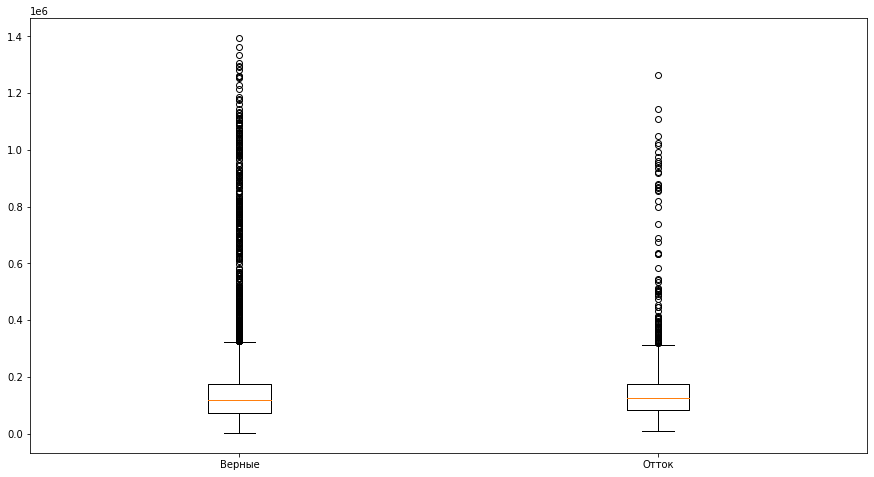

In [49]:
plt.boxplot([vernye['est_salary'], ottok['est_salary']], labels = ['Верные', 'Отток'])
plt.show()

## Промежуточные итоги - выделение признаков, влияющих на отток


По результатам проведенного исследовательского анализа, оценки корреляции параметров и проверки статистических гипотез выделим отдельные сегменты параметров, для которых отток клиентов выше среднего по банку

* возраст 18-35 или 48-61
* мужчины
* нет кредитной карты
* баланс на счете больше 676 т.р.
* балл собственности от 3
* оценочный доход в интервале 101 - 242
* количество продуктов от 3
* кредитный рейтинг в интервале 832 - 908

## Выделение сегментов, в которых отток выше, чем в среднем по банку

### ТОП сегментов параметров с самым большим оттоком 

Построим рейтинг сегментов отдельных параметров, которые больше базового, по проценту оттока 

In [50]:
ottok_col_all.query('proc >= @ottok_base').sort_values(by='proc', ascending= False).head(50)\
    .style.apply(highlight_stat, subset='p-val')\
    .apply(highlight_stat, subset='z-krit')\
    .apply(highlight_proc, subset='proc')\
    .format({'all': '{:.0f}'.format, 'ottok': '{:,.0f}'.format, 'proc': '{:.2f}'.format,\
             'p-val': '{:.4f}'.format, 'z-krit': '{:.4f}'.format})

,col,seg,all,ottok,proc,p-val,z-krit
18,products,4,474,300,63.29,0.0000,0.0000
14,equity,9,13,7,53.85,0.0050,0.0009
51,balance,1460-119113,770,376,48.83,0.0000,0.0000
12,equity,7,80,37,46.25,0.0000,0.0000
19,products,5,19,8,42.11,0.0175,0.0071
11,equity,6,161,58,36.02,0.0000,0.0000
13,equity,8,17,6,35.29,0.0705,0.0688
50,balance,1125-1460,769,266,34.59,0.0000,0.0000
37,score,853-873,1024,309,30.18,0.0000,0.0000
10,equity,5,1915,576,30.08,0.0000,0.0000


*если заморочиться - можно брать кретрии из этой таблицы. Тут надо будет научиться скаладывать кретирии одной колонки, выделять "больше - меньше", строковые, численные... Пока назначим критерии вручную, тем более наверняка будет необходимость использовать критерии, которые не показывают высоких значений оттока, но должны влиять на сегметацию. Например, город, пол*

In [51]:
#Для презентации график
ottok_all_graf = ottok_col_all.copy()
ottok_all_graf['col'] = ottok_all_graf['col'].apply(lambda x: col_rus[x][0])
ottok_all_graf2 = ottok_all_graf.query('proc >= @ottok_base').groupby(['col', 'seg'])\
        .agg({'proc': 'min', 'z-krit': 'min'}).sort_values(by='proc')

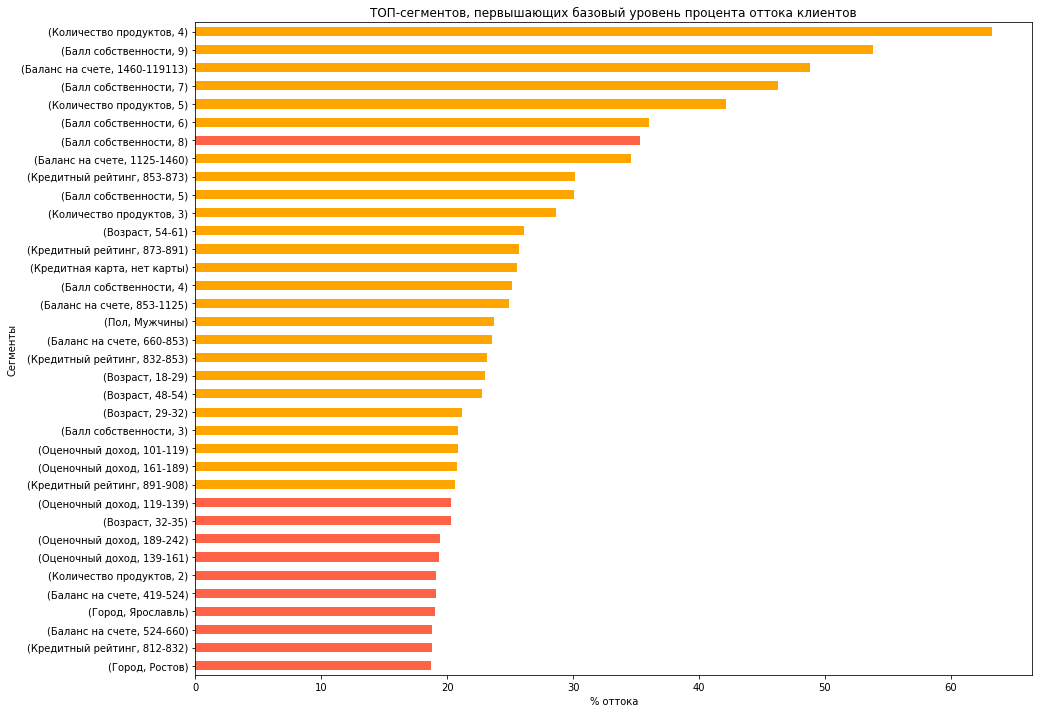

In [52]:
ottok_all_graf2['proc'].plot.barh(figsize=(15,12), \
           color=(ottok_all_graf2['z-krit'] < 0.05).map({True: 'orange', False: 'tomato'}))
plt.title('ТОП-сегментов, первышающих базовый уровень процента оттока клиентов')
plt.ylabel('Сегменты')
plt.xlabel('% оттока')
plt.show()

### Сочетания сегментов отдельных параметров

Оценим, какие сочетания трех различных сегментов датут объединеный сегмент с наибольшими оттоками клиентов. Для этого возьмем сегменты, для которых отток клиентов значительно выше среднего по банку. Немного округлим границы сегментов.

* мужчины
* возраст 18-35 или 48-61
* нет карты
* кредитный рейтинг в интервле 800 - 900
* оценочный доход в интервале 100 - 250 тр
* баланс на счете болье 680 т.р.
* количество продуктов больше 3
* бал собственности выше 4

In [53]:
seg_1par = ['gender == "М"', 
#       'gender == "Ж"', 
#       '48 <= age <= 61', 
#       '18 <= age <= 35',
       '(48 <= age <= 61 or 18 <= age <= 35)',
       'credit_card == 0',
       '800 < score < 900', 
       'balance > 680000',  
#       '100000 <= est_salary <= 20000',
       '100000 <= est_salary <= 250000',
       'products >= 3',
       'equity >= 4',   
      ]

In [54]:
# -------------- Цикл обсчета оттока в укрупненных сегментах ------------
# перебираем комбинации из трех признаков. 
# если в сегменте меньше 500 клиентов переходим к следующей комбинации
# вычисляем отток для укрупненного сегмента
# отбираем сочетания сегментов, в которых отток больше 45% 
#

c_seg1par = len(seg_1par)
l=0
s=0
seg_3par = pd.DataFrame([], columns=['query', 'all', 'ottok', 'proc'])
for i in range(0, c_seg1par):
    for k in range(i+1, c_seg1par):
        for j in range(k+1, c_seg1par):
            s +=1
            qst = seg_1par[i]+' and '+seg_1par[k]+' and '+seg_1par[j]
            a = data.query(qst)['userid'].count()
            if a < 500: continue
            if a > 0:
                o = data.query('churn ==1 and '+qst)['userid'].count()
                p = round(100 * o / a, 2)
            if a > 500 and p > 45:    
                seg_3par.loc[l] = [qst, a, o, p]
                l +=1
print('проверка числа комбинаций! должны быть равны:', s, math.comb(c_seg1par, 3))                

проверка числа комбинаций! должны быть равны: 56 56


In [55]:
seg_3par.sort_values(by='proc', ascending=False)

,query,all,ottok,proc
1,"gender == ""М"" and credit_card == 0 and balance > 680000",604,331,54.80
5,"gender == ""М"" and products >= 3 and equity >= 4",519,280,53.95
11,balance > 680000 and products >= 3 and equity >= 4,585,314,53.68
0,"gender == ""М"" and (48 <= age <= 61 or 18 <= age <= 35) and balance > 680000",829,430,51.87
8,(48 <= age <= 61 or 18 <= age <= 35) and products >= 3 and equity >= 4,512,265,51.76
6,(48 <= age <= 61 or 18 <= age <= 35) and credit_card == 0 and balance > 680000,713,369,51.75
2,"gender == ""М"" and credit_card == 0 and equity >= 4",704,348,49.43
7,(48 <= age <= 61 or 18 <= age <= 35) and balance > 680000 and 100000 <= est_salary <= 250000,871,423,48.56
9,credit_card == 0 and balance > 680000 and 100000 <= est_salary <= 250000,765,358,46.80
3,"gender == ""М"" and balance > 680000 and 100000 <= est_salary <= 250000",913,427,46.77


Получили  укрупненные сегменты из трех параметров, с количеством клиентов более 500 и с наибольшей долей оттока. Можно, порекомендовать отделу маркетинга, прежде всего работать с этими сегментами.

Сегменты с наибольшим уровнем оттока клиентов:

- Мужчина, без кредиткой карты, с балансом счет более 680 тр
- Мужчина, пользующийся тремя и более продуктами банка, с оценкой недвижимости от 4
- Клиент с балансом счета более 680 тр, пользующийся тремя и более продуктами банка, с оценкой недвижимости от 4


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Отличная сегментация

In [56]:
#Для презентации русификация
seg_3par_copy = seg_3par.copy()
seg_3par_copy.columns = (['Сегмент', 'Клиентов', 'Отток', 'Процент'])
seg_3par_copy.replace(
         {'age': 'Возраст', 
           'city': 'Город', 
#           'gender': 'Пол', 
           'equity': 'Балл собственности', 
           'products': 'Продуктов банка',    
           'credit_card': 'Кредитная карта',               
           'score': 'Кредитный рейтинг', 
           'balance': 'Баланс на счете', 
           'est_salary': 'Оценочный доход',
           'and': 'и',
           'or': 'или',
           '== 0': ' - нет',
           '>=': 'от',
           'gender == "М"': 'Мужчина',
           'gender == "Ж"': 'Женщина'
         }, regex=True).sort_values(by='Процент', ascending=False)

,Сегмент,Клиентов,Отток,Процент
1,Мужчина и Кредитная карта - нет и Баланс на счете > 680000,604,331,54.80
5,Мужчина и Продуктов банка от 3 и Балл собственности от 4,519,280,53.95
11,Баланс на счете > 680000 и Продуктов банка от 3 и Балл собственности от 4,585,314,53.68
0,Мужчина и (48 <= Возраст <= 61 или 18 <= Возраст <= 35) и Баланс на счете > 680000,829,430,51.87
8,(48 <= Возраст <= 61 или 18 <= Возраст <= 35) и Продуктов банка от 3 и Балл собственности от 4,512,265,51.76
6,(48 <= Возраст <= 61 или 18 <= Возраст <= 35) и Кредитная карта - нет и Баланс на счете > 680000,713,369,51.75
2,Мужчина и Кредитная карта - нет и Балл собственности от 4,704,348,49.43
7,(48 <= Возраст <= 61 или 18 <= Возраст <= 35) и Баланс на счете > 680000 и 100000 <= Оценочный доход <= 250000,871,423,48.56
9,Кредитная карта - нет и Баланс на счете > 680000 и 100000 <= Оценочный доход <= 250000,765,358,46.80
3,Мужчина и Баланс на счете > 680000 и 100000 <= Оценочный доход <= 250000,913,427,46.77


### Сочетания укрупненных сегментов

Очевидно, укрупненные сегменты пересекаются, то есть один и тот же клиент может попадать в разные укрупненные сегменты. 
Определим сочетание трех укрупненных сементов оттока, которые дадут наибольших охват клиентов.

In [57]:
# -------------- Цикл обсчета охвата в сочетании трех укрупненных сегментах ------------
# Перебираем комбинации из трех укрупненных сегментов. 
# Чем больше сегментов - тем дольше будет выполняться перебор
# Числом сегментов можно управлять через ограничение оттока в предыдушем цикле
# Объединяем userid из сегментов и удаяем дубликаты по userid 
# Получаем полный охват клиентов от трех укрупненных сегментов

c_seg3par = len(seg_3par)

l=0
s=0
top_ohvat_seg = pd.DataFrame([],\
        columns=['query1', 'c_user1', 'query2', 'c_user2', 'query3', 'c_user3', 'c_user'])
for i in range(0, c_seg3par):
    for k in range(i+1, c_seg3par):
        for j in range(k+1, c_seg3par):
            s +=1
            q1 = seg_3par.loc[i, 'query']
            c1 = seg_3par.loc[i, 'all']
            q2 = seg_3par.loc[k, 'query']
            c2 = seg_3par.loc[k, 'all']
            q3 = seg_3par.loc[j, 'query']
            c3 = seg_3par.loc[j, 'all']
            u = len(pd.concat([data.query(q1)['userid'], \
                               data.query(q2)['userid'], \
                               data.query(q3)['userid']]).drop_duplicates())
            top_ohvat_seg.loc[l] = [q1, c1, q2, c2, q3, c3, u]
            l +=1
print('проверка числа комбинаций! должны быть равны:', s, math.comb(c_seg3par, 3))                    

проверка числа комбинаций! должны быть равны: 220 220


In [58]:
top_ohvat_seg.sort_values(by='c_user', ascending=False).head(5)

,query1,c_user1,query2,c_user2,query3,c_user3,c_user
177,"gender == ""М"" and balance > 680000 and equity >= 4",1126,(48 <= age <= 61 or 18 <= age <= 35) and balance > 680000 and 100000 <= est_salary <= 250000,871,credit_card == 0 and balance > 680000 and equity >= 4,977,1982
175,"gender == ""М"" and balance > 680000 and equity >= 4",1126,(48 <= age <= 61 or 18 <= age <= 35) and balance > 680000 and 100000 <= est_salary <= 250000,871,(48 <= age <= 61 or 18 <= age <= 35) and products >= 3 and equity >= 4,512,1918
159,"gender == ""М"" and balance > 680000 and 100000 <= est_salary <= 250000",913,(48 <= age <= 61 or 18 <= age <= 35) and products >= 3 and equity >= 4,512,credit_card == 0 and balance > 680000 and equity >= 4,977,1909
179,"gender == ""М"" and balance > 680000 and equity >= 4",1126,(48 <= age <= 61 or 18 <= age <= 35) and products >= 3 and equity >= 4,512,credit_card == 0 and balance > 680000 and 100000 <= est_salary <= 250000,765,1898
147,"gender == ""М"" and balance > 680000 and 100000 <= est_salary <= 250000",913,"gender == ""М"" and products >= 3 and equity >= 4",519,credit_card == 0 and balance > 680000 and equity >= 4,977,1888


Обработав только эти три укрупненных сегмента, можно охватить почти 20% клиентов:

- Мужчина, с балансом счет более 680 тр, с оценкой недвижимости от 4
- Клиенты в возрасте 18-35 или 48-61, с балансом счет более 680 тр и оценкой дохода от 100 до 250 тр
- Клиент без кредитки, с балансом счет более 680 тр, с оценкой недвижимости от 4

## Итоговые рекомендации заказчику

По итогам исседования определены сегменты клиентов, с которыми следует работать для уменьшения оттока клиентов из банка: 

**Сегменты, в которых наивысший уровень оттока:**

- Мужчина, без кредиткой карты, с балансом счет более 680 тр
- Мужчина, пользующийся тремя и более продуктами банка, с оценкой недвижимости от 4
- Клиент с балансом счета более 680 тр, пользующийся тремя и более продуктами банка, с оценкой недвижимости от 4

**Сегменты, которые в сочетании дадут наибольший охват клиентов:**

- Мужчина, с балансом счет более 680 тр, с оценкой недвижимости от 4
- Клиенты в возрасте 18-35 или 48-61, с балансом счет более 680 тр и оценкой дохода от 100 до 250 тр
- Клиент без кредитки, с балансом счет более 680 тр, с оценкой недвижимости от 4

**Предложения по мероприятиям для клиентов из этих сегментов:**

- Предложения по кредитным картам - акции (повышенный кеш-бэк / бонус / розыгрыш) для "мужских" трат (бензин, рыбалка, охота)
- Предложения для клиентов с большими суммами на счетах в банке - повышенный процент, премиум программы, кредитка бонусом
- Предложения для владельцев недвижимости - акции (повышенный кеш-бэк / бонус / розыгрыш) по оплате комунальных услуг, имущественных налогов, страхование
- Провести соц.исследование по банковским продуктам - большой отток клиентов, которые уже попробовали несколько продуктов. видимо, они им не понравились.


Презентация результатов исследования

https://disk.yandex.ru/i/OU_a_Uvdhxn8tw

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №3__

Хорошая презентация как по содержанию так и по структуре. Все важные моменты исследования представлены. Используешь тезисный подход и не злоупотребляешь текстом на слайдах.
    
---
    
У Яндекс Практикума есть отличный и бесплатный курс по презентациям. Советую, в свободное время освоить его (https://practicum.yandex.ru/profile/visual-presentation/)    

</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Итоговый вывод завершает твое исследование. Представлены основные результаты полученные в ходе анализа, но самое главное - даны рекомендации по сегментам. Это важное качество для аналитика. Развивай его и дальше

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №1 </b>



Итог ревью - ты проделал хорошую работу! Многие расчеты корректные, грамотная интерпретация полученных результатов! У тебя есть понимание данного процесса. Но есть некоторые моменты которые тебе предстоит доработать, чтобы я смог принять твой проект. Если возникнут вопросы - обязательно задавай. Буду ждать!

---

Нужно поправить:

1) Замена пропусков

2) Вывод по предобрабоке данных

3) Корреляция

4) Гипотезы

5) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> 
    
Поправил - дабавил - ответил
    
Добавил вывод пары графиков / таблиц для презентации.
    </div>

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №2 </b>



Отличная работа, осталось поправить 2 момента:

ЗЫ. На следующую итерацию присылай презентацию

---

Нужно поправить:

1) Замена пропусков

2) Гипотезы

3) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> 
    
Поправил - дабавил
    </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №3__

От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
    
---
    


Все замечания учтены. Успехов на SQL!
</div>